In [318]:
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string as str
import numpy as np

import spacy
from spacy import displacy

from wordcloud import WordCloud

import re
import nltk
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [216]:
df = pd.read_csv('fake_job_postings.csv')
df.shape

(17880, 18)

In [217]:
fraud_df = df[df['fraudulent'] == 1].iloc[0:100, :]
real_df = df[df['fraudulent'] == 0].iloc[0:400, :]
real_df.shape

(400, 18)

In [218]:
df = pd.concat([fraud_df, real_df],axis=0)
df = df.sample(frac=1).reset_index(drop=True)
df.shape

(500, 18)

In [219]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,323,Quality Assurance Tester,"US, CA, Los Angeles",NaN,45000-65000,Searching for the perfect creative agent or mi...,Company Profile:Our client is a very busy and ...,NaN,Fully Paid Medical and Dental401kVacationClose...,0,1,0,Full-time,Associate,Bachelor's Degree,Marketing and Advertising,Quality Assurance,0
1,97,Software Test Engineer [QA]: Cucumber / LAMP /...,"GB, , London",NaN,NaN,At LendInvest fundamentally changing the way p...,#URL_f10cb7b12799258d60f3a0af7edf7799f96bced6f...,Responsibilities:Manual and Automation testing...,HackathonsLots of greenfield projectsOpportuni...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Information Technology,0
2,187,Receptionist,"US, CA, Los Angeles",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Receptionist will be based in Los Angeles...,Required Qualifications:High School diploma or...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Legal Services,Administrative,0
3,86,Research Associate,"US, CA, Newport Beach",NaN,NaN,Green Street Advisors is the industry leader i...,Green Street Advisors is the preeminent indepe...,In addition to a strongwork ethic and motivati...,Green Street Advisors is the preeminent indepe...,0,1,1,Full-time,Associate,Bachelor's Degree,Financial Services,Financial Analyst,0
4,31,Customer Service Technical Specialist,"US, MA, Waltham",NaN,NaN,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Technical Specialist will...,Qualifications:Minimum of 6 months customer se...,NaN,0,1,0,Full-time,Entry level,High School or equivalent,Computer Software,Customer Service,0


In [220]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               500 non-null    int64 
 1   title                500 non-null    object
 2   location             492 non-null    object
 3   department           159 non-null    object
 4   salary_range         98 non-null     object
 5   company_profile      401 non-null    object
 6   description          500 non-null    object
 7   requirements         438 non-null    object
 8   benefits             304 non-null    object
 9   telecommuting        500 non-null    int64 
 10  has_company_logo     500 non-null    int64 
 11  has_questions        500 non-null    int64 
 12  employment_type      423 non-null    object
 13  required_experience  299 non-null    object
 14  required_education   331 non-null    object
 15  industry             391 non-null    object
 16  function

In [222]:
df.isnull().sum().sort_values(ascending=False) / len(df.index) * 100

salary_range           80.4
department             68.2
required_experience    40.2
benefits               39.2
function               35.0
required_education     33.8
industry               21.8
company_profile        19.8
employment_type        15.4
requirements           12.4
location                1.6
job_id                  0.0
title                   0.0
description             0.0
telecommuting           0.0
has_questions           0.0
has_company_logo        0.0
fraudulent              0.0
dtype: float64

real jobs percentage  80.0
fake jobs percentage 20.0


<Axes: xlabel='fraudulent', ylabel='count'>

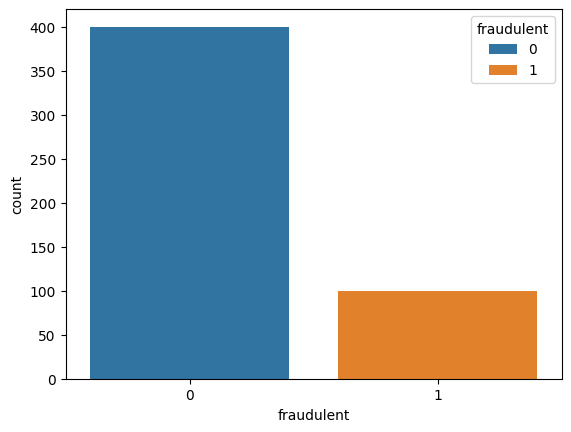

In [223]:
print('real jobs percentage ', df['fraudulent'].value_counts()[0] / df.shape[0] * 100)
print('fake jobs percentage', df['fraudulent'].value_counts()[1] / df.shape[0] * 100)

sns.countplot(x='fraudulent', data=df, hue='fraudulent')

<Axes: >

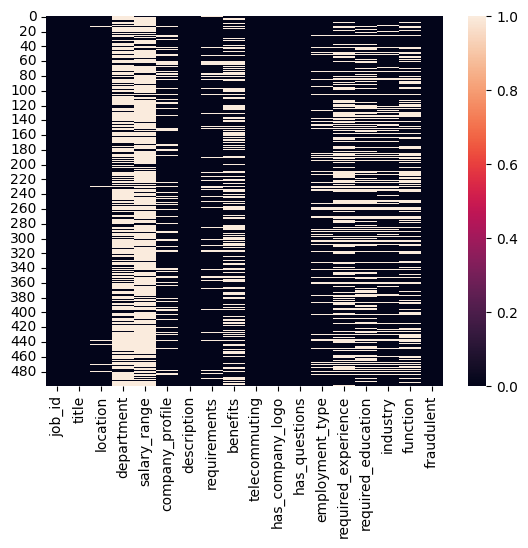

In [224]:
sns.heatmap(df.isna(), cbar=True)

In [225]:
df.describe(include='object')

,title,location,department,salary_range,company_profile,description,requirements,benefits,employment_type,required_experience,required_education,industry,function
count,500,492,159,98,401,500,438,304,423,299,331,391,325
unique,402,283,90,77,177,436,362,220,5,7,9,57,31
top,English Teacher Abroad,"US, NY, New York",Marketing,30000-40000,"Novitex Enterprise Solutions, formerly Pitney ...","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,Full-time,Entry level,Bachelor's Degree,Education Management,Customer Service
freq,36,26,12,6,59,40,43,53,326,107,173,58,57


In [226]:
df.describe(include='all')

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
count,500.000000,500,492,159,98,401,500,438,304,500.000000,500.000000,500.000000,423,299,331,391,325,500.000000
unique,NaN,402,283,90,77,177,436,362,220,NaN,NaN,NaN,5,7,9,57,31,NaN
top,NaN,English Teacher Abroad,"US, NY, New York",Marketing,30000-40000,"Novitex Enterprise Solutions, formerly Pitney ...","Play with kids, get paid for it Love travel? J...",University degree required. TEFL / TESOL / CEL...,See job description,NaN,NaN,NaN,Full-time,Entry level,Bachelor's Degree,Education Management,Customer Service,NaN
freq,NaN,36,26,12,6,59,40,43,53,NaN,NaN,NaN,326,107,173,58,57,NaN
mean,527.896000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038000,0.784000,0.396000,NaN,NaN,NaN,NaN,NaN,0.200000
std,763.280422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.191388,0.411926,0.489554,NaN,NaN,NaN,NaN,NaN,0.400401
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,125.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,250.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,375.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000


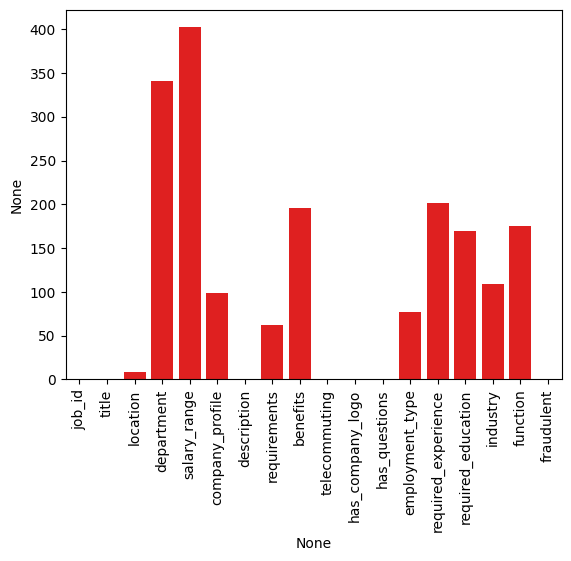

salary_range           80.4
department             68.2
required_experience    40.2
benefits               39.2
function               35.0
required_education     33.8
industry               21.8
company_profile        19.8
employment_type        15.4
requirements           12.4
location                1.6
job_id                  0.0
title                   0.0
description             0.0
telecommuting           0.0
has_questions           0.0
has_company_logo        0.0
fraudulent              0.0
dtype: float64


In [227]:
null_values = df.isnull().sum()
sns.barplot(x=null_values.index, y=null_values, color='red')
plt.xticks(rotation='vertical')
plt.show()
print(null_values.sort_values(ascending=False) / df.shape[0] * 100)

In [228]:
categorical_columns = []

for col in df.columns:
    print(f'Unique rows in {col}:', df[col].nunique())
    if df[col].nunique() < 15:
        categorical_columns.append(col)
print('Categorical columns:',categorical_columns)

Unique rows in job_id: 500
Unique rows in title: 402
Unique rows in location: 283
Unique rows in department: 90
Unique rows in salary_range: 77
Unique rows in company_profile: 177
Unique rows in description: 436
Unique rows in requirements: 362
Unique rows in benefits: 220
Unique rows in telecommuting: 2
Unique rows in has_company_logo: 2
Unique rows in has_questions: 2
Unique rows in employment_type: 5
Unique rows in required_experience: 7
Unique rows in required_education: 9
Unique rows in industry: 57
Unique rows in function: 31
Unique rows in fraudulent: 2
Categorical columns: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'fraudulent']


In [229]:
for col in list(set(df.columns) - set(categorical_columns)):
    if df[col].dtypes == 'object':
        df[col] = df[col].fillna('')
print(df.isnull().sum())

job_id                   0
title                    0
location                 0
department               0
salary_range             0
company_profile          0
description              0
requirements             0
benefits                 0
telecommuting            0
has_company_logo         0
has_questions            0
employment_type         77
required_experience    201
required_education     169
industry                 0
function                 0
fraudulent               0
dtype: int64


In [230]:
df['employment_type'] = df['employment_type'].fillna('Employement Unavailable')
df['required_experience'] = df['required_experience'].fillna('Experience Unavailable')
df['required_education'] = df['required_education'].fillna('Unspecified')

<Axes: >

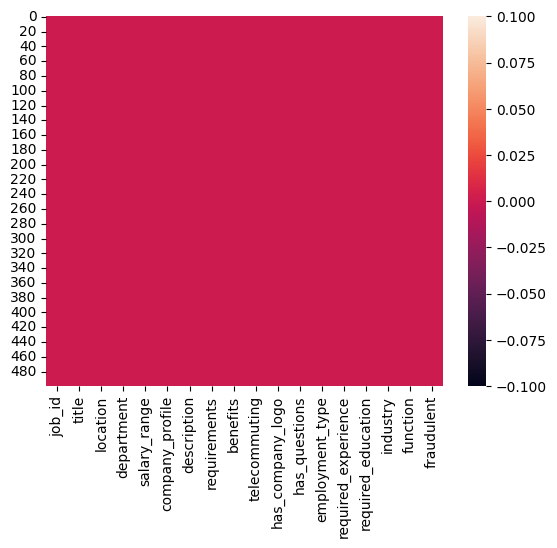

In [231]:
sns.heatmap(df.isnull())

In [232]:
df['textual_data'] = df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']

In [233]:
df['Number_of_URLs'] = df['textual_data'].str.count('#URL_')
df['Number_of_Phones'] = df['textual_data'].str.count('#PHONE_')
df['Number_of_Emails'] = df['textual_data'].str.count('#EMAIL_')

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,employment_type,required_experience,required_education,industry,function,fraudulent,textual_data,Number_of_URLs,Number_of_Phones,Number_of_Emails
0,323,Quality Assurance Tester,"US, CA, Los Angeles",,45000-65000,Searching for the perfect creative agent or mi...,Company Profile:Our client is a very busy and ...,,Fully Paid Medical and Dental401kVacationClose...,0,...,Full-time,Associate,Bachelor's Degree,Marketing and Advertising,Quality Assurance,0,Searching for the perfect creative agent or mi...,0,0,0
1,97,Software Test Engineer [QA]: Cucumber / LAMP /...,"GB, , London",,,At LendInvest fundamentally changing the way p...,#URL_f10cb7b12799258d60f3a0af7edf7799f96bced6f...,Responsibilities:Manual and Automation testing...,HackathonsLots of greenfield projectsOpportuni...,0,...,Full-time,Mid-Senior level,Bachelor's Degree,Financial Services,Information Technology,0,At LendInvest fundamentally changing the way p...,2,0,0
2,187,Receptionist,"US, CA, Los Angeles",,,"Novitex Enterprise Solutions, formerly Pitney ...",The Receptionist will be based in Los Angeles...,Required Qualifications:High School diploma or...,,0,...,Full-time,Entry level,High School or equivalent,Legal Services,Administrative,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0
3,86,Research Associate,"US, CA, Newport Beach",,,Green Street Advisors is the industry leader i...,Green Street Advisors is the preeminent indepe...,In addition to a strongwork ethic and motivati...,Green Street Advisors is the preeminent indepe...,0,...,Full-time,Associate,Bachelor's Degree,Financial Services,Financial Analyst,0,Green Street Advisors is the industry leader i...,2,0,0
4,31,Customer Service Technical Specialist,"US, MA, Waltham",,,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Technical Specialist will...,Qualifications:Minimum of 6 months customer se...,,0,...,Full-time,Entry level,High School or equivalent,Computer Software,Customer Service,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0


In [234]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [235]:
def preprocess(raw_text):
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    sentence = sentence.lower()
    tokens = sentence.split()
    clean_tokens = [t for t in tokens if t not in stopwords.words("english")]
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return " ".join(clean_tokens)

In [236]:
df['company_profile'] = df['company_profile'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['requirements'] = df['requirements'].apply(preprocess)
df['benefits'] = df['benefits'].apply(preprocess)


In [239]:
def split_country(location):
    l = location.split(',')
    return l[0]

In [240]:
loc_split =[]
for loc in df.location:
    loc_split.append(loc.split(','))

loc_split = pd.DataFrame(loc_split)
loc_split = loc_split[[1, 2]]
loc_split = loc_split.rename(columns={1: "state", 2:'city'})
loc_split.head()

,state,city
0,CA,Los Angeles
1,,London
2,CA,Los Angeles
3,CA,Newport Beach
4,MA,Waltham


In [244]:
df = df.join(loc_split)

ValueError: columns overlap but no suffix specified: Index(['state', 'city'], dtype='object')

In [260]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry,function,fraudulent,textual_data,Number_of_URLs,Number_of_Phones,Number_of_Emails,state,city,state_city
0,323,Quality Assurance Tester,"US, CA, Los Angeles",,45000-65000,searching perfect creative agent mission insid...,company profile client busy rapidly expanding ...,,fully paid medical dental kvacationclose enoug...,0,...,Marketing and Advertising,Quality Assurance,0,Searching for the perfect creative agent or mi...,0,0,0,CA,Los Angeles,"CA, Los Angeles"
1,97,Software Test Engineer [QA]: Cucumber / LAMP /...,"GB, , London",,,lendinvest fundamentally changing way people t...,url f cb b f af edf f bced feddbb f aff fast g...,responsibility manual automation testing end e...,hackathonslots greenfield projectsopportunity ...,0,...,Financial Services,Information Technology,0,At LendInvest fundamentally changing the way p...,2,0,0,,London,", London"
2,187,Receptionist,"US, CA, Los Angeles",,,novitex enterprise solution formerly pitney bo...,receptionist based los angeles ca right candid...,required qualification high school diploma equ...,,0,...,Legal Services,Administrative,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0,CA,Los Angeles,"CA, Los Angeles"
3,86,Research Associate,"US, CA, Newport Beach",,,green street advisor industry leader real esta...,green street advisor preeminent independent re...,addition strongwork ethic motivation learn ass...,green street advisor preeminent independent re...,0,...,Financial Services,Financial Analyst,0,Green Street Advisors is the industry leader i...,2,0,0,CA,Newport Beach,"CA, Newport Beach"
4,31,Customer Service Technical Specialist,"US, MA, Waltham",,,novitex enterprise solution formerly pitney bo...,customer service technical specialist based wa...,qualification minimum month customer service r...,,0,...,Computer Software,Customer Service,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0,MA,Waltham,"MA, Waltham"


In [247]:
df['state_city'] = df['state'] + ", " + df['city']
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,industry,function,fraudulent,textual_data,Number_of_URLs,Number_of_Phones,Number_of_Emails,state,city,state_city
0,323,Quality Assurance Tester,"US, CA, Los Angeles",,45000-65000,searching perfect creative agent mission insid...,company profile client busy rapidly expanding ...,,fully paid medical dental kvacationclose enoug...,0,...,Marketing and Advertising,Quality Assurance,0,Searching for the perfect creative agent or mi...,0,0,0,CA,Los Angeles,"CA, Los Angeles"
1,97,Software Test Engineer [QA]: Cucumber / LAMP /...,"GB, , London",,,lendinvest fundamentally changing way people t...,url f cb b f af edf f bced feddbb f aff fast g...,responsibility manual automation testing end e...,hackathonslots greenfield projectsopportunity ...,0,...,Financial Services,Information Technology,0,At LendInvest fundamentally changing the way p...,2,0,0,,London,", London"
2,187,Receptionist,"US, CA, Los Angeles",,,novitex enterprise solution formerly pitney bo...,receptionist based los angeles ca right candid...,required qualification high school diploma equ...,,0,...,Legal Services,Administrative,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0,CA,Los Angeles,"CA, Los Angeles"
3,86,Research Associate,"US, CA, Newport Beach",,,green street advisor industry leader real esta...,green street advisor preeminent independent re...,addition strongwork ethic motivation learn ass...,green street advisor preeminent independent re...,0,...,Financial Services,Financial Analyst,0,Green Street Advisors is the industry leader i...,2,0,0,CA,Newport Beach,"CA, Newport Beach"
4,31,Customer Service Technical Specialist,"US, MA, Waltham",,,novitex enterprise solution formerly pitney bo...,customer service technical specialist based wa...,qualification minimum month customer service r...,,0,...,Computer Software,Customer Service,0,"Novitex Enterprise Solutions, formerly Pitney ...",0,0,0,MA,Waltham,"MA, Waltham"


In [256]:
df.state = df.state.str.strip()
df.city = df.city.str.strip()

In [269]:
df = df[(df['state'] != '') & (df['city'] != '')]

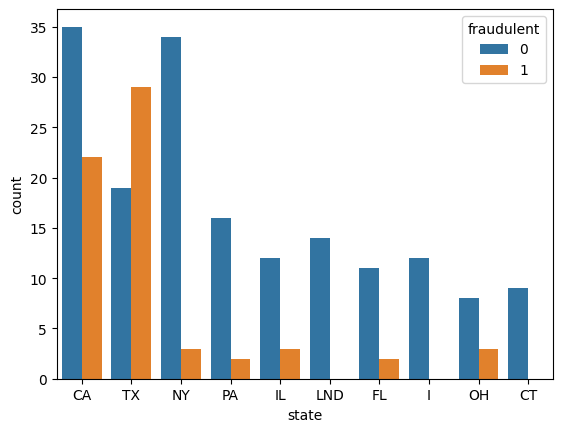

In [271]:
sns.countplot(x='state', data=df, hue='fraudulent', order = df['state'].value_counts().iloc[0:10].index)
plt.show()

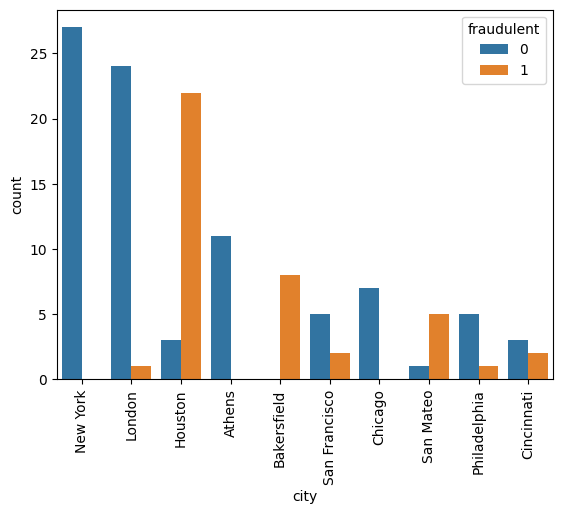

In [272]:
sns.countplot(x='city', data=df, hue='fraudulent', order=df['city'].value_counts().iloc[0:10].index)
plt.xticks(rotation='vertical')
plt.show()

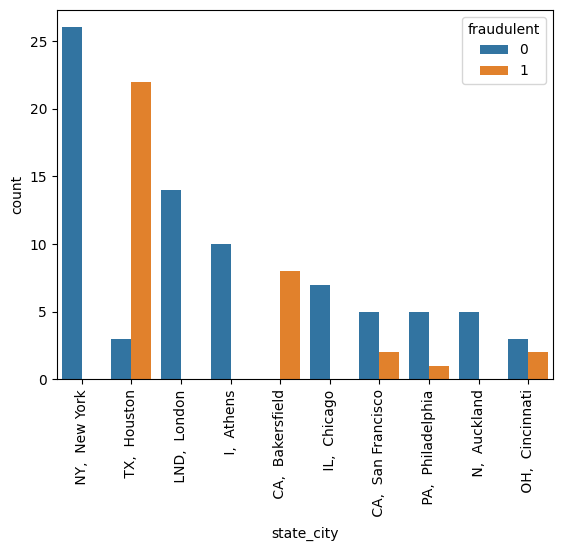

In [273]:
sns.countplot(x='state_city', data=df, hue='fraudulent', order = df['state_city'].value_counts().iloc[0:10].index)
plt.xticks(rotation='vertical')
plt.show()


In [274]:
df['country'] = df['location'].apply(split_country)

C:\Users\DELL\AppData\Local\Temp\ipykernel_2960\3691800356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['country'] = df['location'].apply(split_country)


In [287]:
df = df[df['country'] != '']

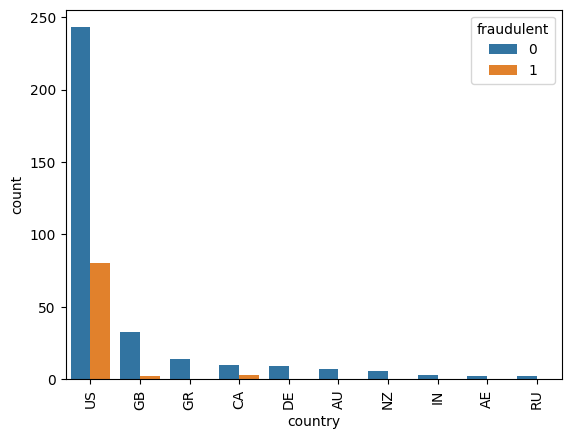

In [288]:
sns.countplot(x='country', data=df, hue='fraudulent', order=df['country'].value_counts().iloc[0:10].index)
plt.xticks(rotation='vertical')
plt.show()

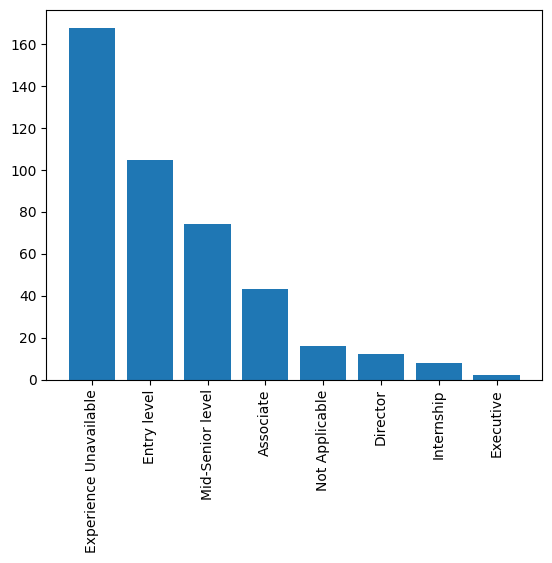

In [307]:
experiences = df['required_experience'].value_counts()
plt.bar(experiences.keys(), experiences.values)
plt.xticks(rotation='vertical')
plt.show()

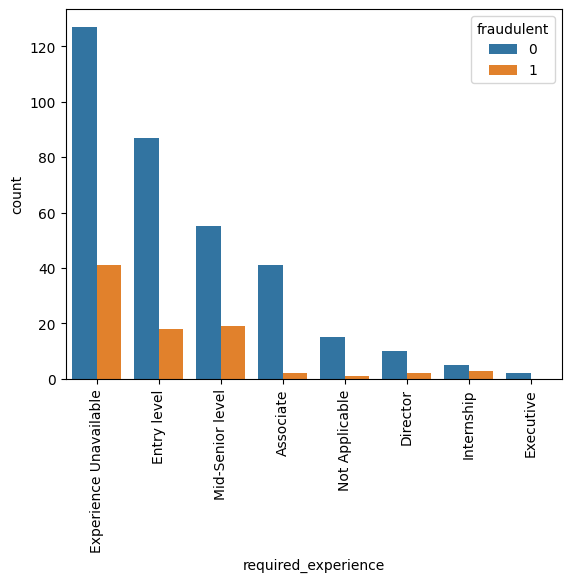

In [313]:
sns.countplot(x='required_experience', data=df, hue='fraudulent', order=df['required_experience'].value_counts().iloc[0:10].index)
plt.xticks(rotation='vertical')
plt.show()

In [303]:
nlp = spacy.load('en_core_web_sm')

In [304]:
def extract_nouns(doc):
    nouns = [token.text for token in doc if token.pos_ == 'NOUN']
    return nouns

In [305]:
df['profile_nouns'] = df['company_profile'].apply(lambda x: extract_nouns(nlp(x)))
df['profile_nouns']

0      [agent, mission, job, agency, detail, order, p...
2      [enterprise, solution, pitney, bowes, manageme...
3      [advisor, industry, leader, estate, estate, in...
4      [enterprise, solution, pitney, bowes, manageme...
6      [cake, marketing, technology, company, saas, e...
                             ...                        
494                          [teacher, amp, secure, job]
495    [working, producer, profitability, precision, ...
496    [aker, solution, provider, product, system, se...
497    [aker, solution, provider, product, system, se...
499    [trainer, fitness, training, company, service,...
Name: profile_nouns, Length: 428, dtype: object

In [306]:
df['description_nouns'] = df['description'].apply(lambda x: extract_nouns(nlp(x)))
df['description_nouns']

0      [company, profile, client, agency, development...
2      [receptionist, candidate, part, team, growth, ...
3      [advisor, research, trading, consulting, firm,...
4      [customer, service, specialist, location, cand...
6      [team, disrupt, industry, game, performance, m...
                             ...                        
494    [kid, love, travel, job, usd, cost, living, ho...
495    [success, staff, career, growth, development, ...
496    [overviewaker, solution, provider, product, sy...
497    [overviewaker, solution, provider, product, sy...
499    [trainer, company, manager, expansion, join, o...
Name: description_nouns, Length: 428, dtype: object

In [314]:
df['requirements_nouns'] = df['requirements'].apply(lambda x: extract_nouns(nlp(x)))
df['requirements_nouns']

0                                                     []
2      [qualification, school, diploma, equivalent, y...
3      [addition, strongwork, motivation, associate, ...
4      [qualification, month, customer, service, expe...
6      [bachelor, degree, computer, science, field, e...
                             ...                        
494    [university, degree, teaching, experience, pas...
495    [skill, school, diploma, year, experience, pre...
496    [attribute, bachelor, engineering, degree, yea...
497    [attributesb, e, instrumentation, electronics,...
499    [year, experience, ability, plan, execute, pro...
Name: requirements_nouns, Length: 428, dtype: object

In [315]:
df['benefits_nouns'] = df['benefits'].apply(lambda x: extract_nouns(nlp(x)))
df['benefits_nouns']

0                                                     []
2                                                     []
3      [advisor, research, trading, consulting, firm,...
4                                                     []
6      [cake, compensation, stock, option, benefit, v...
                             ...                        
494                                   [job, description]
495                                  [position, benefit]
496                                                   []
497                                                   []
499    [work, profit, share, ownership, partnerpay, c...
Name: benefits_nouns, Length: 428, dtype: object

In [316]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,Number_of_Phones,Number_of_Emails,state,city,state_city,country,profile_nouns,description_nouns,requirements_nouns,benefits_nouns
0,323,Quality Assurance Tester,"US, CA, Los Angeles",,45000-65000,searching perfect creative agent mission insid...,company profile client busy rapidly expanding ...,,fully paid medical dental kvacationclose enoug...,0,...,0,0,CA,Los Angeles,"CA, Los Angeles",US,"[agent, mission, job, agency, detail, order, p...","[company, profile, client, agency, development...",[],[]
2,187,Receptionist,"US, CA, Los Angeles",,,novitex enterprise solution formerly pitney bo...,receptionist based los angeles ca right candid...,required qualification high school diploma equ...,,0,...,0,0,CA,Los Angeles,"CA, Los Angeles",US,"[enterprise, solution, pitney, bowes, manageme...","[receptionist, candidate, part, team, growth, ...","[qualification, school, diploma, equivalent, y...",[]
3,86,Research Associate,"US, CA, Newport Beach",,,green street advisor industry leader real esta...,green street advisor preeminent independent re...,addition strongwork ethic motivation learn ass...,green street advisor preeminent independent re...,0,...,0,0,CA,Newport Beach,"CA, Newport Beach",US,"[advisor, industry, leader, estate, estate, in...","[advisor, research, trading, consulting, firm,...","[addition, strongwork, motivation, associate, ...","[advisor, research, trading, consulting, firm,..."
4,31,Customer Service Technical Specialist,"US, MA, Waltham",,,novitex enterprise solution formerly pitney bo...,customer service technical specialist based wa...,qualification minimum month customer service r...,,0,...,0,0,MA,Waltham,"MA, Waltham",US,"[enterprise, solution, pitney, bowes, manageme...","[customer, service, specialist, location, cand...","[qualification, month, customer, service, expe...",[]
6,406,Database Engineering Manager,"US, CA, Newport Beach",Engineering,,cake marketing technology company providing le...,join exciting fast paced collaborative team co...,bachelor degree computer science related field...,cake offer competitive compensation stock opti...,0,...,0,0,CA,Newport Beach,"CA, Newport Beach",US,"[cake, marketing, technology, company, saas, e...","[team, disrupt, industry, game, performance, m...","[bachelor, degree, computer, science, field, e...","[cake, compensation, stock, option, benefit, v..."


In [320]:
df_fraud = df[df['fraudulent'] == 1]
df_not_fraud = df[df['fraudulent'] == 0]

In [ ]:
company_profile_fraud_words = ' '.join(df_fraud['company_profile'])
print(company_profile_fraud_words[0:100])

staffing amp recruiting done right oil amp energy industry represented candidate automatically grant


In [324]:
company_profile_fraud_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                                    background_color='white',
                                    width=1000,
                                    height=1000,
                                ).generate(company_profile_fraud_words)

Text(0.5, 1.0, 'Fraud words')

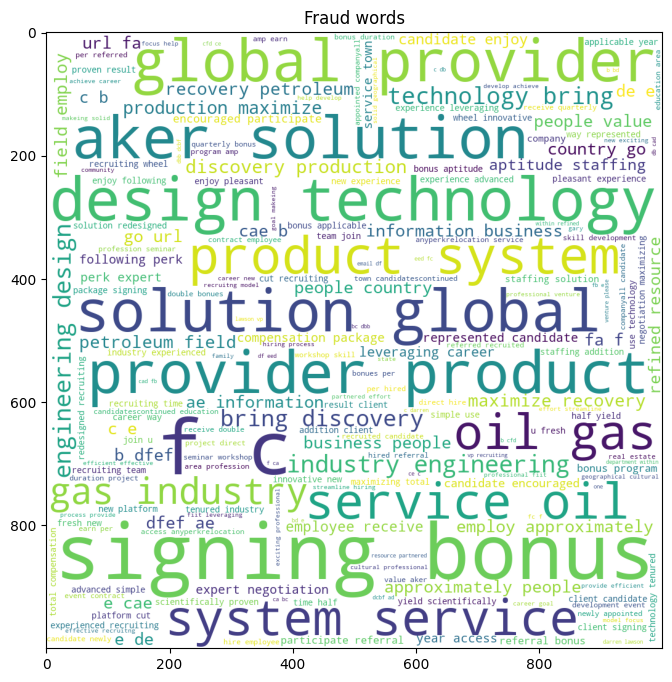

In [327]:
plt.figure(1, figsize=(8,8))
plt.imshow(company_profile_fraud_wordcloud)
plt.title('Fraud words')

In [328]:
company_profile_not_fraud_words = ' '.join(df_not_fraud['company_profile'])
print(company_profile_not_fraud_words[0:100])

searching perfect creative agent mission inside job agency find detail need know order complete sear


In [330]:
company_profile_not_fraud_wordcloud = WordCloud(stopwords=stopwords.words('english'),
                                        background_color='white',
                                        height=1000,
                                        width=1000           
                                    ).generate(company_profile_not_fraud_words)

Text(0.5, 1.0, 'Not Fraud Words')

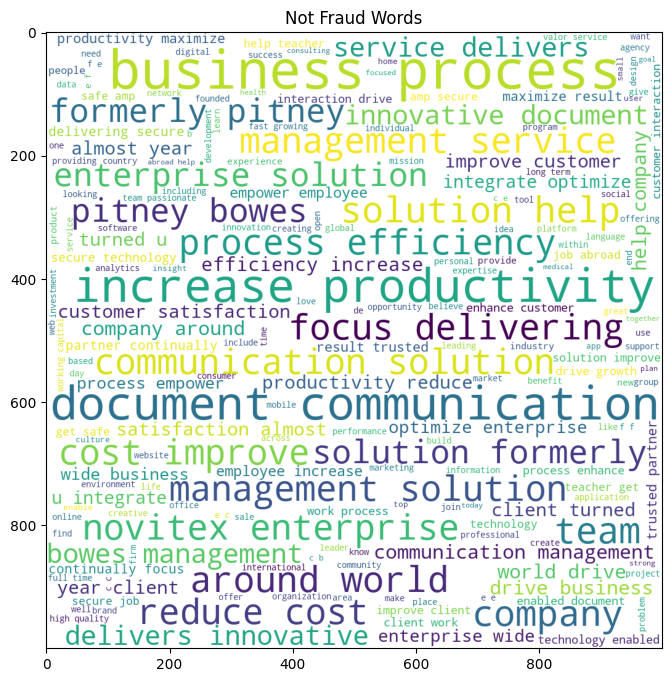

In [332]:
plt.figure(figsize=(8,8))
plt.imshow(company_profile_not_fraud_wordcloud)
plt.title('Not Fraud Words')